# --- Pasos a seguir para estimar clusters ---

* Podemos estimar la k:
    * <span style="color:red"><b>NO</span>: Propagación de la afinidad
    * <span style="color:green"><b>SI</span>: Podemos usar la distancia Euclídea:
        * <span style="color:green"><b>SI</span>: K-Means
        * <span style="color:red"><b>NO</span>: Buscar valores centrales:
            * <span style="color:green"><b>SI</span>: K-Medoides 
            * <span style="color:red"><b>NO</span>: Los datos son linealmente separables:
                * <span style="color:green"><b>SI</span>: Clustering aglomerativo
                * <span style="color:red"><b>NO</span>: Clustering Espectral

# Clustering con Python

### Importar el dataset

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep = ";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
df.shape

(1599, 12)

In [41]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

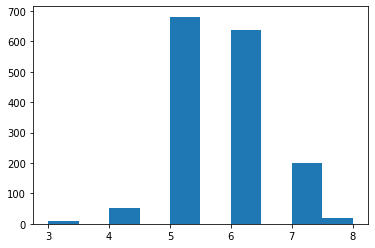

In [42]:
plt.hist(df["quality"])

In [43]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [44]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [47]:
md_h = pd.Series(clus.labels_) #modelo jerarquico, la h de es hierarchy
md_h.head() #vemos a que cluster pertenece cada una de las muestras

0    2
1    2
2    2
3    3
4    2
dtype: int64

Text(0, 0.5, 'Número de vinos del cluster')

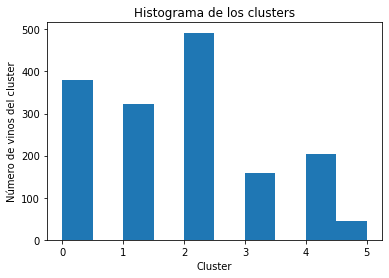

In [48]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [49]:
clus.children_ #vemos cada uno de los hijos para cada uno de los nodos hojas

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [51]:
Z = linkage(df_norm, "ward")
Z[-4:,] #vemos que pinta tienen los últimos 4 puntos y ver todas las columnas

array([[3186.        , 3188.        ,    6.32847722,  696.        ],
       [3179.        , 3191.        ,    6.43793061,  537.        ],
       [3192.        , 3193.        ,    8.26055739, 1062.        ],
       [3194.        , 3195.        ,   12.00433304, 1599.        ]])

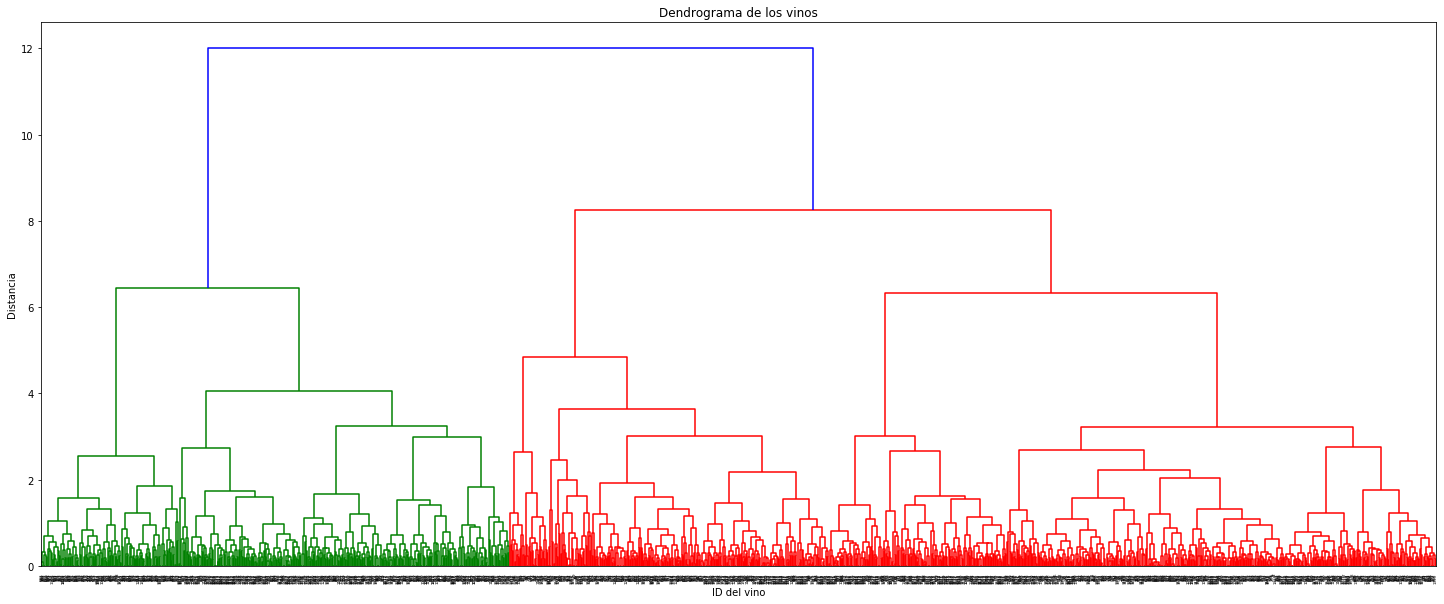

In [57]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

Ahora hacemos lo mismo pero limpiando (ver T6-2), e intentando quedarnos con los 6 clusters que se ven en la gráfica de barras, con un color_threshold de corte en 4 aprox.

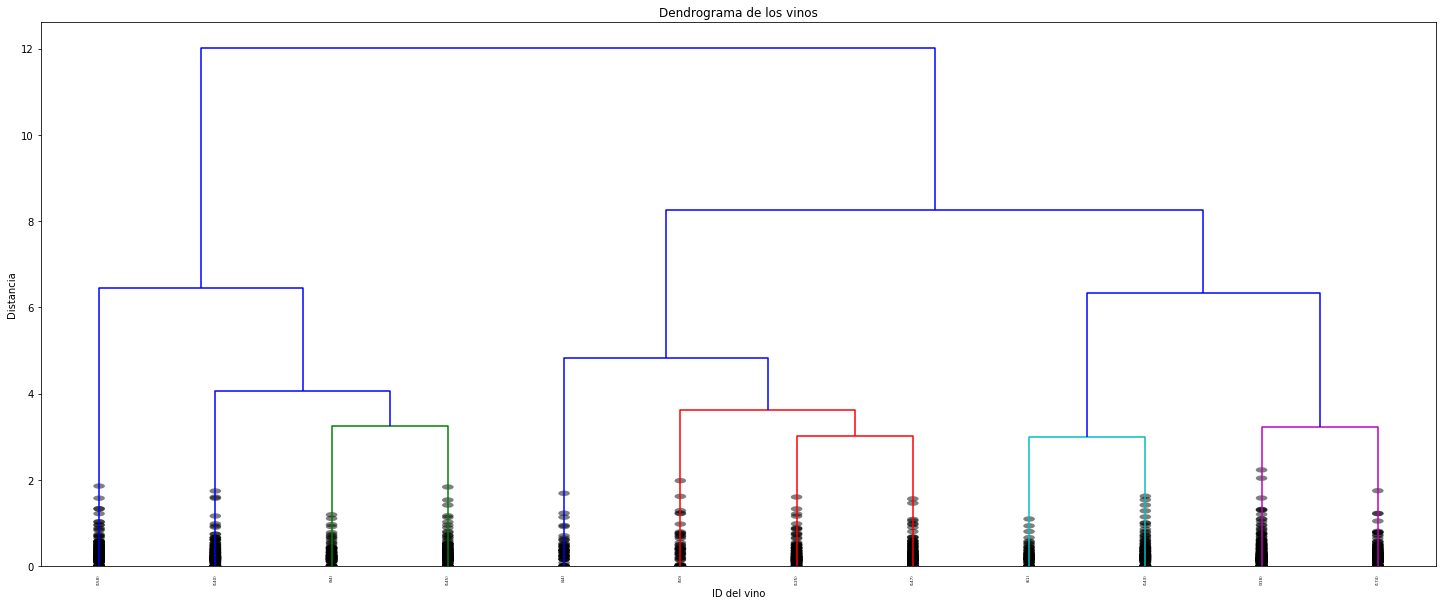

In [58]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4., color_threshold=4,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)
plt.show()

## Clustering con K-means

In [59]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [60]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
model.labels_ #nos muestra el cluster a cual pertenece cada uno de los vinos

array([2, 2, 2, ..., 4, 4, 0], dtype=int32)

In [70]:
md_k = pd.Series(model.labels_) #modelo de K-means
md_k.head()

0    2
1    2
2    2
3    3
4    2
dtype: int32

In [63]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [64]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2


(array([275.,   0., 321.,   0., 504.,   0., 248.,   0., 221.,  30.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

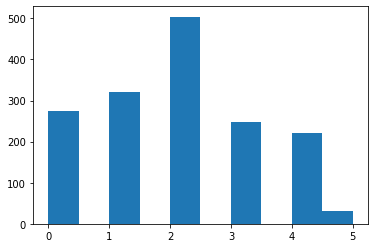

In [65]:
plt.hist(md_k)

In [66]:
model.cluster_centers_ #obtenemos los centroides de cada cluster(6, una para cada cluster)

array([[0.36148029, 0.16073474, 0.41854545, 0.10438356, 0.10601912,
        0.15984635, 0.08353357, 0.41547991, 0.42073014, 0.23560152,
        0.47865734, 0.69090909],
       [0.31615802, 0.27819741, 0.30367601, 0.15109034, 0.12690933,
        0.37876793, 0.29641249, 0.53832553, 0.43665219, 0.1784655 ,
        0.21436217, 0.45358255],
       [0.26288805, 0.36009866, 0.11775794, 0.09152125, 0.12257864,
        0.14479935, 0.10721297, 0.49071161, 0.48729846, 0.15502329,
        0.22069088, 0.44087302],
       [0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.17374765, 0.32511002, 0.09027149, 0.09344201, 0.09552875,
        0.25205532, 0.1239787 , 0.32289154, 0.58039691, 0.18600807,
        0.49163476, 0.61266968],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821,

In [67]:
model.inertia_ #Eficiencia del modelo: distancia de cada elemento a su baricentro elevado al cuadrado(sin normalciar en este caso)

186.54302104790867

## Interpretación final

In [68]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.361480,0.160735,0.418545,0.104384,0.106019,0.159846,0.083534,0.415480,0.420730,0.235602,0.478657,0.690909,0.138182
1,0.316158,0.278197,0.303676,0.151090,0.126909,0.378768,0.296412,0.538326,0.436652,0.178465,0.214362,0.453583,1.049844
2,0.262888,0.360099,0.117758,0.091521,0.122579,0.144799,0.107213,0.490712,0.487298,0.155023,0.220691,0.440873,2.023810
3,0.582429,0.205797,0.511976,0.134004,0.131180,0.139085,0.091830,0.655964,0.331947,0.222499,0.291853,0.547581,2.036290
4,0.173748,0.325110,0.090271,0.093442,0.095529,0.252055,0.123979,0.322892,0.580397,0.186008,0.491635,0.612670,3.479638
5,0.337168,0.292237,0.481333,0.075571,0.537896,0.209390,0.210718,0.514391,0.233596,0.590020,0.165128,0.466667,4.900000
